In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Dataset

In [351]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [352]:
data = pd.read_csv('housing.csv')
print(data.shape)
new_val = pd.get_dummies(data.ocean_proximity)
data[new_val.columns] = new_val
data.drop(['ocean_proximity'],axis=1,inplace=True)

(20640, 10)


In [353]:
data.dropna(subset=['total_bedrooms'],inplace=True)
data.median_income = data.median_income * 10000
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,38711.616013,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,18992.912493,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,4999.000000,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,25637.000000,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,35365.000000,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,47440.000000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,150001.000000,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [354]:
scaler.fit(data)
data = scaler.transform(data)
data = pd.DataFrame(data,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])

In [355]:
print(np.sqrt(scaler.var_))
print(scaler.mean_)

[2.00352886e+00 2.13629539e+00 1.25914971e+01 2.18521609e+03
 4.21374759e+02 1.13318076e+03 3.82289871e+02 1.89924477e+04
 1.15432842e+05 4.96639531e-01 4.65667065e-01 1.56410459e-02
 3.14249493e-01 3.34773856e-01]
[-1.19570689e+02  3.56332213e+01  2.86330935e+01  2.63650423e+03
  5.37870553e+02  1.42494695e+03  4.99433465e+02  3.87116160e+04
  2.06864413e+05  4.42127930e-01  3.17917095e-01  2.44702197e-04
  1.11094798e-01  1.28615475e-01]


In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  float64
 10  INLAND              20433 non-null  float64
 11  ISLAND              20433 non-null  float64
 12  NEAR BAY            20433 non-null  float64
 13  NEAR OCEAN          20433 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [357]:
data.dropna(subset=['median_house_value'],inplace=True)

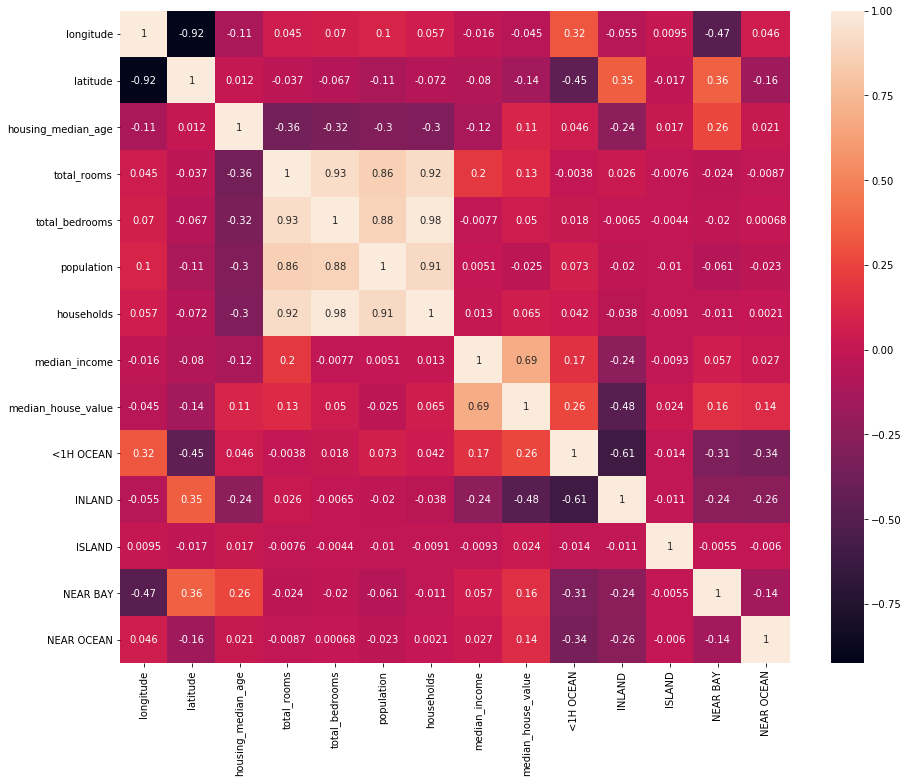

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,12))
f = data.corr() 
sns.heatmap(f, annot=True)

In [359]:
y = data['median_house_value']
X = data.drop(['median_house_value'],axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,-0.890239,-0.682713,-0.015645,2.828661,-0.384186
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,-0.890239,-0.682713,-0.015645,2.828661,-0.384186


In [360]:
from sklearn.model_selection import train_test_split
trainset,testset = train_test_split(data,test_size=0.3)

In [361]:
y_train = trainset['median_house_value']
X_train = trainset.drop(['median_house_value'],axis=1)
y_test = testset['median_house_value']
X_test = testset.drop(['median_house_value'],axis=1)

In [362]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(14303, 13) (14303,)
(6130, 13) (6130,)


In [363]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(pred,y_test)
score = r2_score(pred,y_test)
lr_params = lr.coef_
print("parameters are:", params)
print("loss is:",mse)
print("score: ",score)

parameters are: [-4.59343182e-01 -4.60389430e-01  1.14825128e-01 -1.41161458e-01
  3.97718244e-01 -3.59859408e-01  1.46636236e-01  6.54403349e-01
  1.59938516e+12  1.49964098e+12  5.03706515e+10  1.01201363e+12
  1.07811059e+12]
loss is: 0.3378777936201839
score:  0.4613015790403582


# 2 Ridge regression

In [364]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge(alpha=100)
ridge.fit(X_train,y_train)
pred = ridge.predict(X_test)
ridge_params = ridge.coef_
loss = mean_squared_error(pred,y_test)
score = r2_score(pred,y_test)
print("parameters are:", ridge_params)
print("loss is:", loss)
print("score: ",score)

parameters are: [-0.37398453 -0.37646627  0.12403561 -0.08848888  0.31583445 -0.34730755
  0.16516007  0.63483262  0.06142864 -0.13049499  0.01593577  0.02866951
  0.062731  ]
loss is: 0.33876613668067196
score:  0.4495219226437187


# 3 LASSO regression

In [365]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
pred = lasso.predict(X_test)
rmse = mean_squared_error(pred,y_test)
score = r2_score(pred,y_test)
lasso_params = lasso.coef_
print("parameters are:", lasso_params)
print("loss is:",rmse)
print("score: ",score)

parameters are: [-0.17893822 -0.1729051   0.12013623 -0.          0.23932914 -0.27785962
  0.08879084  0.61644045  0.         -0.24667021  0.          0.
  0.02472785]
loss is: 0.34781772931115806
score:  0.40819779172163007


# 4 EERM

In [366]:
class EERM() :
      
    def __init__( self, learning_rate, iterations, Lambda, alpha, user_summary ) :
          
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.Lambda = Lambda
        self.alpha = alpha
        self.user_summary = user_summary
        self.mu = []
        self.std = []
          
    # Function for model training
    
    def normalize(data):
        for i in range(0,data.shape[1]-1):
            data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
            mu.append(np.mean(data[:,i]))
            std.append(np.std(data[:, i]))
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features 
        self.m, self.n = X.shape    
        # weight initialization  
        self.W = np.zeros( self.n )   
        self.b = 0   
        self.X = X  
        self.Y = Y    
        # gradient descent learning            
        for i in range( self.iterations ) :         
            self.update_weights()       
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )  
        # calculate gradients     
        dW = np.zeros( self.n )  
        for j in range( self.n ) :
            #print(j)
            risk = -(2*(self.X.iloc[:,j]).dot(self.Y - Y_pred))
            explainability = self.Lambda*(-(2*(self.X.iloc[:, j]).dot(self.alpha*self.user_summary - Y_pred)))
            dW[j] = (risk+explainability)/self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m   
        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db      
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
        return X.dot( self.W ) + self.b

In [367]:
new_data = X_train.drop(['longitude','total_bedrooms','population','households','ISLAND'],axis=1)
new_lr = LinearRegression()
new_lr.fit(new_data,y_train)
u = new_lr.predict(new_data)
#print(u.shape,y_train.shape)

In [368]:
eerm = EERM(learning_rate=0.01, iterations=1000, Lambda=1.0, alpha=1.0, user_summary=u)
eerm.fit(X_train,y_train)
pred = eerm.predict(X_test)
#print(pred)
rmse = mean_squared_error(pred,y_test)
score = r2_score(pred,y_test)
eerm_params = eerm.W
print("parameters are:", eerm_params)
print("loss is:",rmse)
print("score: ",score)

parameters are: [-0.16658044 -0.16440398  0.12962296 -0.00486912  0.14031113 -0.18356022
  0.10673382  0.62684828  0.07324504 -0.17838226  0.01858606  0.05439121
  0.08754341]
loss is: 0.35283733168529574
score:  0.41328478745500996


# 5 Comparison

In [369]:
coef_eerm = pd.DataFrame(eerm_params.reshape(1,13),columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])
coef_lasso = pd.DataFrame(lasso_params.reshape(1,13),columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])
coef_ridge = pd.DataFrame(ridge_params.reshape(1,13),columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])
coef_lr = pd.DataFrame(lr_params.reshape(1,13),columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN'])

In [370]:
coef_lr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.461208,-0.466952,0.123403,-0.119168,0.38348,-0.35971,0.137899,0.643694,1.075934e+12,1.008835e+12,3.388522e+10,6.807993e+11,7.252639e+11


In [371]:
coef_ridge

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.373985,-0.376466,0.124036,-0.088489,0.315834,-0.347308,0.16516,0.634833,0.061429,-0.130495,0.015936,0.02867,0.062731


In [372]:
coef_lasso

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.178938,-0.172905,0.120136,-0.0,0.239329,-0.27786,0.088791,0.61644,0.0,-0.24667,0.0,0.0,0.024728


In [373]:
coef_eerm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.16658,-0.164404,0.129623,-0.004869,0.140311,-0.18356,0.106734,0.626848,0.073245,-0.178382,0.018586,0.054391,0.087543


In [374]:
f.iloc[8]

longitude            -0.045398
latitude             -0.144638
housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
<1H OCEAN             0.257614
INLAND               -0.484787
ISLAND                0.023525
NEAR BAY              0.160526
NEAR OCEAN            0.140378
Name: median_house_value, dtype: float64

In [375]:
lr_params[0:8]

array([-0.4612083 , -0.46695248,  0.12340279, -0.11916755,  0.38347981,
       -0.35971022,  0.13789928,  0.64369448])

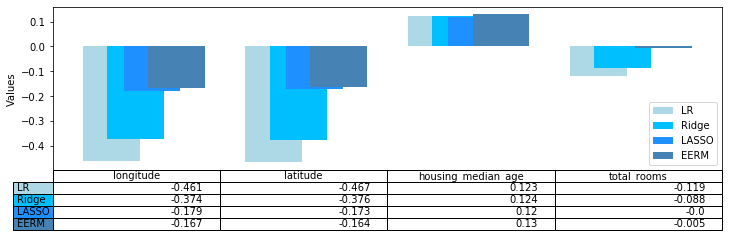

In [376]:
lr_params = [float('{:.3f}'.format(i)) for i in lr_params]
ridge_params = [float('{:.3f}'.format(i)) for i in ridge_params]
lasso_params = [float('{:.3f}'.format(i)) for i in lasso_params]
eerm_params = [float('{:.3f}'.format(i)) for i in eerm_params]
data = [lr_params[0:8],ridge_params[0:8],lasso_params[0:8],eerm_params[0:8]]

columns = ('longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income')
rows = ['LR','Ridge','LASSO','EERM']
"""

"""

x = np.arange(len(columns))  # the label locations
#print(x)
#print(lr_params)
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,3))
rects1 = ax.bar(x[0:4] - 0.2, lr_params[0:4], width, label='LR',color='lightblue')
rects2 = ax.bar(x[0:4] - 0.05, ridge_params[0:4], width, label='Ridge',color='deepskyblue')
rects3 = ax.bar(x[0:4] + 0.05, lasso_params[0:4], width, label='LASSO',color='dodgerblue')
rects4 = ax.bar(x[0:4] + 0.2, eerm_params[0:4], width, label='EERM',color='steelblue')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
#ax.set_xticks(x, columns)
plt.xticks([])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)
#ax.bar_label(rects4, padding=3)

the_table1 = plt.table(cellText=[lr_params[0:4],ridge_params[0:4],lasso_params[0:4],eerm_params[0:4]],
                      rowLabels=rows,
                      rowColours=['lightblue','deepskyblue','dodgerblue','steelblue'],
                      colLabels=columns[0:4],
                      loc='bottom')

#plt.figure(figsize=(20,5))
#plt.subplots_adjust(left=0.5, bottom=0.5)
#fig.tight_layout()


plt.show()

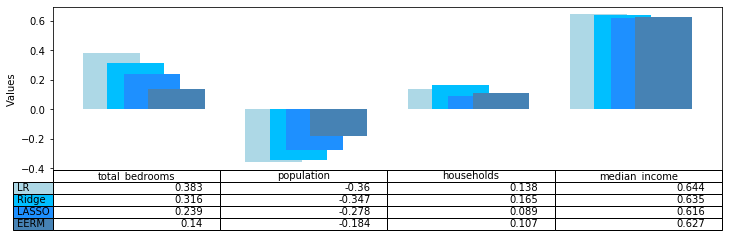

In [378]:
lr_params = [float('{:.3f}'.format(i)) for i in lr_params]
ridge_params = [float('{:.3f}'.format(i)) for i in ridge_params]
lasso_params = [float('{:.3f}'.format(i)) for i in lasso_params]
eerm_params = [float('{:.3f}'.format(i)) for i in eerm_params]
data = [lr_params[0:8],ridge_params[0:8],lasso_params[0:8],eerm_params[0:8]]

columns = ('longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income')
rows = ['LR','Ridge','LASSO','EERM']
"""

"""

x = np.arange(len(columns))  # the label locations
#print(x)
#print(lr_params)
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,3))
rects5 = ax.bar(x[4:8] - 0.2, lr_params[4:8], width, label='LR',color='lightblue')
rects6 = ax.bar(x[4:8] - 0.05, ridge_params[4:8], width, label='Ridge',color='deepskyblue')
rects7 = ax.bar(x[4:8] + 0.05, lasso_params[4:8], width, label='LASSO',color='dodgerblue')
rects8 = ax.bar(x[4:8] + 0.2, eerm_params[4:8], width, label='EERM',color='steelblue')
the_table2 = plt.table(cellText=[lr_params[4:8],ridge_params[4:8],lasso_params[4:8],eerm_params[4:8]],
                      rowLabels=rows,
                      rowColours=['lightblue','deepskyblue','dodgerblue','steelblue'],
                      colLabels=columns[4:8],
                      loc='bottom')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
#ax.set_xticks(x, columns)
plt.xticks([])
#ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)
#ax.bar_label(rects4, padding=3)


#plt.figure(figsize=(20,5))
#plt.subplots_adjust(left=0.5, bottom=0.5)
#fig.tight_layout()


plt.show()